In [1]:
import hydra
from omegaconf import OmegaConf
from glob import  glob
from rosa.predict import  predict


BASE_DIR = "/Users/nsofroniew/Documents/data/rosa/outputs/2023-01-30/15-16-37"
config_dir = BASE_DIR + "/.hydra"

with hydra.initialize_config_dir(config_dir=config_dir):
    cfg = hydra.compose(config_name="config", overrides=OmegaConf.load(config_dir + "/overrides.yaml"))

    chkpts = BASE_DIR + "/checkpoints/*.ckpt"
    chkpt = glob(chkpts)[1]

    adata = predict(cfg, chkpt)

display(adata)

/var/folders/6n/b_zkz2ns3_l02s3g4lnlklxr0000gq/T/ipykernel_19056/519882076.py:10: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with hydra.initialize_config_dir(config_dir=config_dir):


RosaLightningModule(
  (model): RosaJointModel(
    (main): Sequential(
      (dual_embed): ParallelEmbed(
        (models): ModuleList(
          (0): Sequential(
            (layer_norm_0): LayerNorm((110,), eps=1e-05, elementwise_affine=True)
            (input_embed_0): Identity()
          )
          (1): Sequential(
            (layer_norm_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
            (input_embed_1): Identity()
          )
        )
      )
      (join_embeds): BilinearEmbeds(
        (model): Bilinear(in1_features=110, in2_features=256, out_features=16, bias=True)
      )
      (feed_forward): Identity()
      (dropout): Dropout(p=0.5, inplace=False)
      (expression_head): ExpressionHead(
        (model): Sequential(
          (projection): Linear(in_features=16, out_features=1, bias=True)
          (activation): Softplus(beta=1, threshold=20)
        )
      )
    )
  )
)


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(
Missing logger folder: /Users/nsofroniew/Documents/GitHub/rosa/notebooks/lightning_logs
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

AnnData object with n_obs × n_vars = 177 × 19429
    obs: 'cell_type', 'count', 'tissue', 'label', 'train', 'marker_gene', 'marker_feature_name'
    var: 'soma_joinid', 'feature_name', 'feature_length', 'external_gene_name', 'gene_biotype', 'column_1', 'column_2', 'column_3', 'column_4', 'train', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_label', 'embedding_pca', 'hvg', 'log1p'
    obsm: 'bin_edges', 'embedding'
    varm: 'embedding', 'embedding_pca'
    layers: 'binned', 'counts', 'log1p', 'normalized_counts', 'prediction'

In [2]:
from rosa.score import score_predictions
from rosa.plotting import plot_expression_and_correlation, plot_marker_gene_heatmap


adata_test, results = score_predictions(adata)

/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))



        mean spearmanr across genes 0.683
        mean spearmanr across cells 0.418
        mean square error 0.565
        ks-statistic on total expression 0.335
        mean percent total expression captured per cell 39.275
        


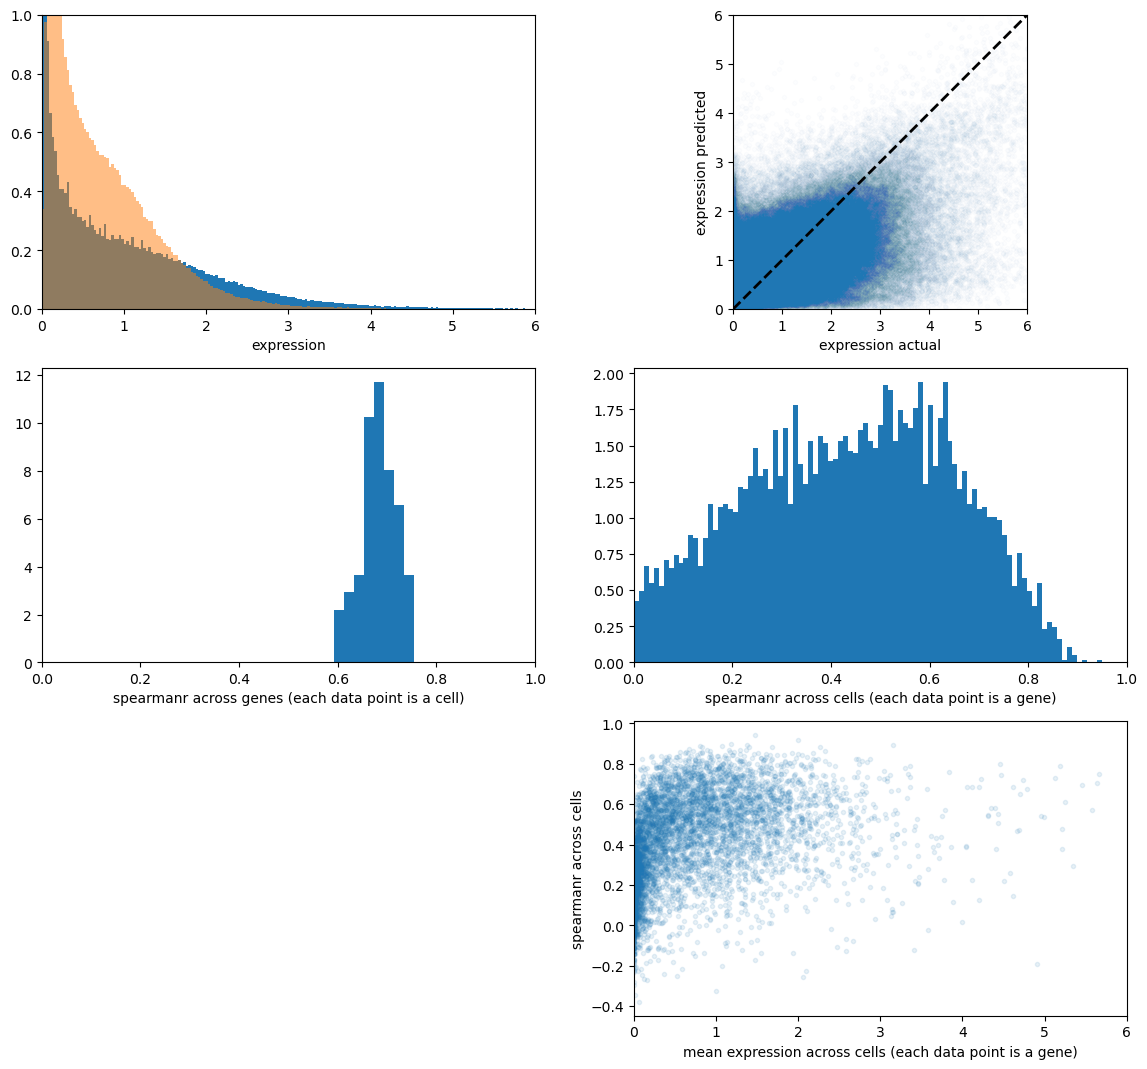

In [3]:
plot_expression_and_correlation(adata_test, results)

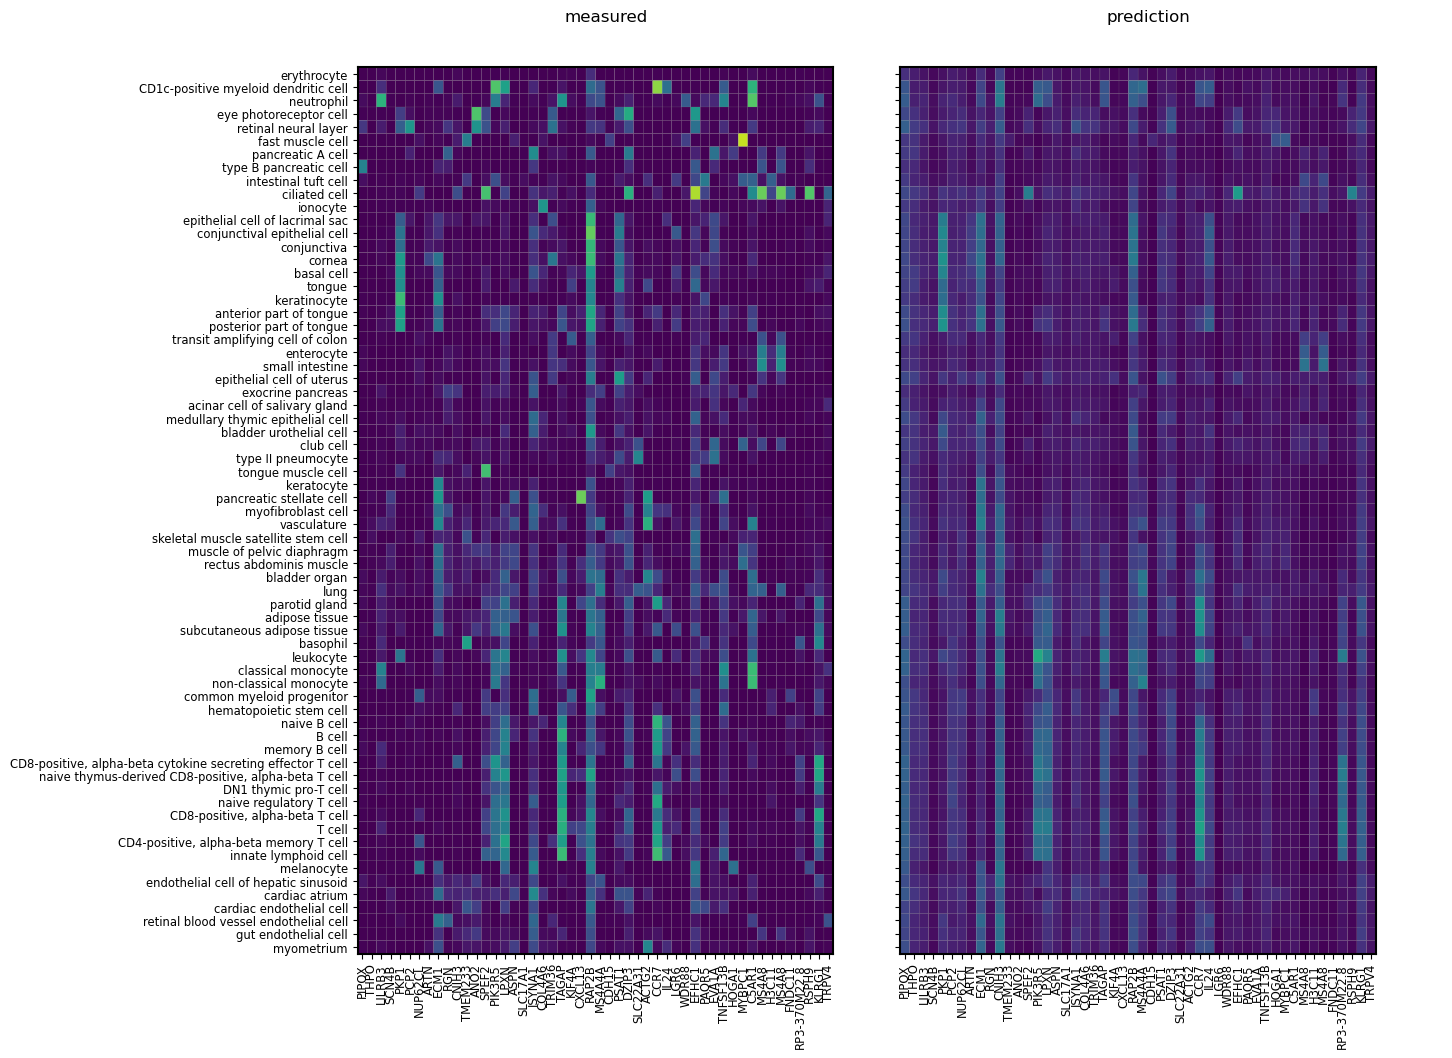

In [4]:
import numpy as np


marker_genes = adata_test.var[adata_test.var['highly_variable']]['feature_name'].values
np.random.seed(42)
marker_genes = np.random.choice(marker_genes, 50)

plot_marker_gene_heatmap(adata_test, marker_genes)

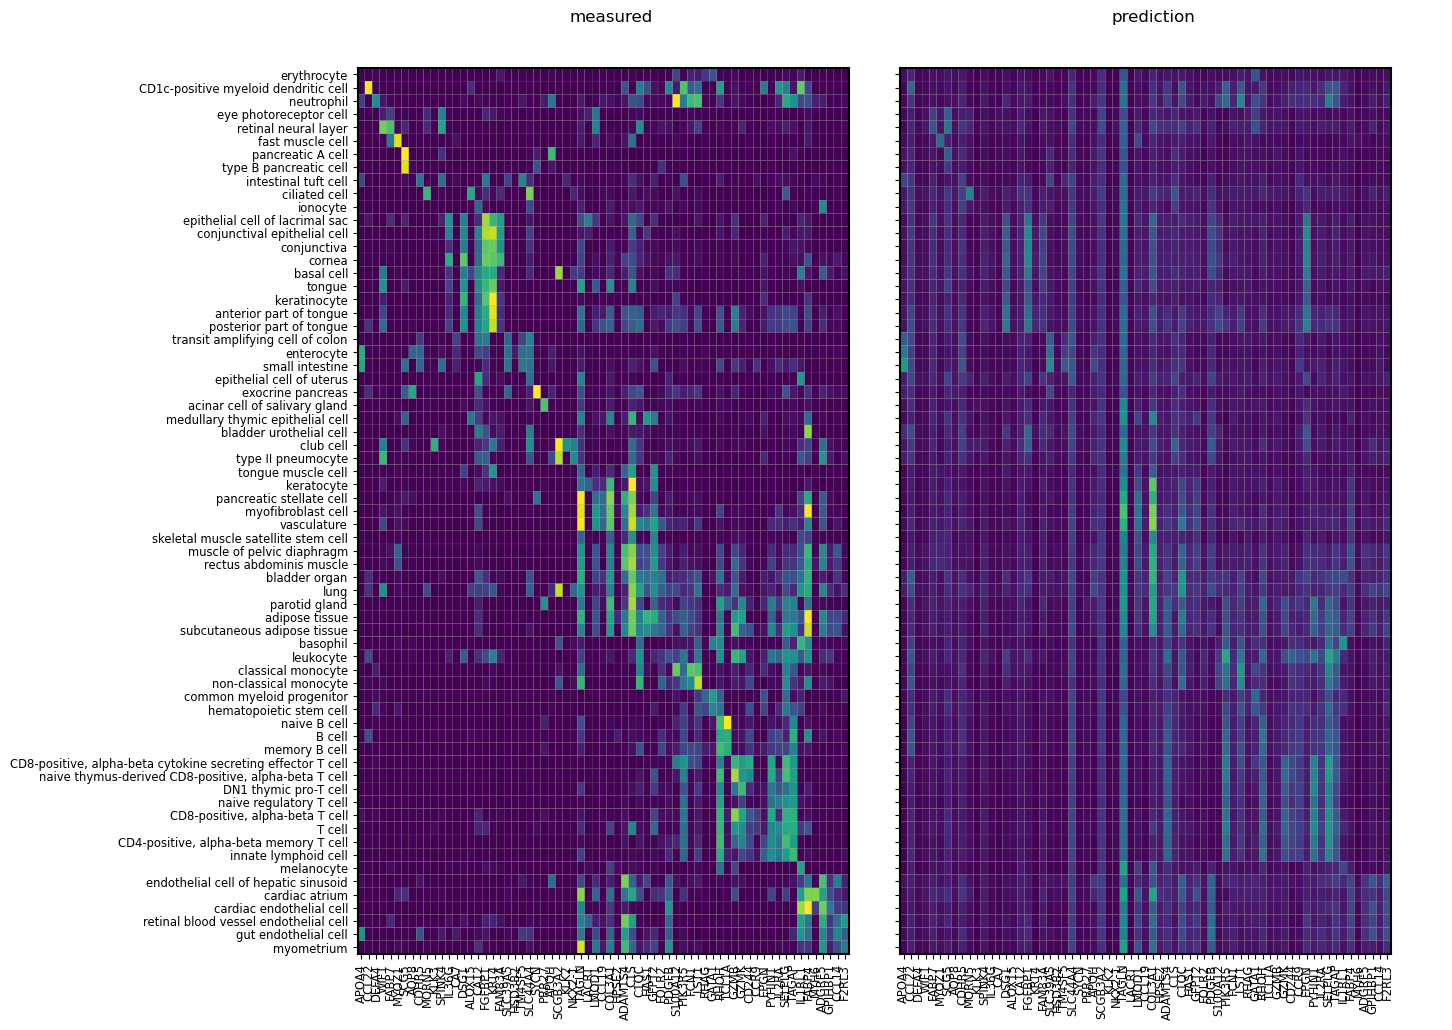

In [5]:
marker_genes_dict = adata_test.obs.set_index('label').to_dict()['marker_feature_name']
plot_marker_gene_heatmap(adata_test, marker_genes_dict)

In [6]:
adata_test.layers['prediction'][:, 2]

array([1.2494589 , 0.7615356 , 1.349689  , 1.1849563 , 1.4128199 ,
       1.2386494 , 1.278383  , 0.62863773, 0.7422594 , 1.0814829 ,
       1.3266668 , 1.1826763 , 1.07035   , 0.8201121 , 1.4970367 ,
       1.1532435 , 0.878716  , 1.0138221 , 1.1130273 , 0.8565839 ,
       1.2184727 , 0.98877096, 1.149351  , 1.0520526 , 1.0175714 ,
       0.8240811 , 1.6773916 , 1.1385082 , 1.2763735 , 1.2672049 ,
       0.850993  , 0.78350306, 0.92623997, 1.0740492 , 1.1026889 ,
       1.169004  , 0.76239693, 1.7560979 , 0.69754523, 1.2708269 ,
       1.3070853 , 0.68477714, 1.1738837 , 0.855289  , 0.86823726,
       0.7858185 , 1.0430907 , 0.7044271 , 0.7006297 , 1.5097219 ,
       1.3479712 , 1.2645584 , 1.0709596 , 0.70649266, 0.8802151 ,
       1.0407356 , 1.1573108 , 1.168207  , 1.2850057 , 0.92429024,
       1.2287238 , 0.86834484, 0.7767006 , 1.3447638 , 0.8167855 ,
       1.0723191 , 1.3529171 ], dtype=float32)

In [7]:
adata_test.layers

Layers with keys: binned, counts, log1p, normalized_counts, prediction